# **Bokeh Library (Team 1)**

Presented by
1. Dishant Bhansali
2. Shashank Guda

### **What is Bokeh?**

Bokeh is a Python interactive visualization library that targets *modern web browsers* for presentation. It allows you to create interactive and real-time plots and dashboards in a Python environment. Bokeh supports various types of plots such as line charts, bar charts, scatter plots, and more. It is **not** included in the Python Standard Library, so we need to install it separately.

In [ ]:
# Code to install bokeh
pip install bokeh

In [1]:
# In a Python interpreter or Jupyter Notebook, you can import Bokeh with the following code:
import bokeh
# Common aliasing can be done as well:
import bokeh as bk

### **Demonstrating a Function**

#### **1.) Scatter Plot**

The code essentially generates a random scatter plot using Bokeh in the notebook. The tools provided allow users to pan, zoom, and reset the plot for exploration.

In [9]:
# Importing necessary Bokeh modules
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import numpy as np

# Initializing the Bokeh notebook output
output_notebook()

# Generating random data points
x = np.random.rand(100)  # Random x-coordinates
y = np.random.rand(100)  # Random y-coordinates

# Creating a Bokeh scatter plot
plot = figure(title="Random Scatter Plot", tools="pan, box_zoom, reset") 
plot.scatter(x, y, size=8, color="blue", alpha=0.7)  # Adding a scatter plot with specified size, color, and transparency

show(plot)


Loading BokehJS ...

#### **2.) Line Chart**

This code demonstrates how to create a simple line chart using Bokeh. The line chart visualizes the relationship between X-axis and Y-axis data points with a green line.

In [10]:
# Importing necessary Bokeh modules
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# Configuring Bokeh to display plots inline notebook
output_notebook()

# Data for the line chart
x = [1, 2, 3, 4, 5]  # X-axis data points
y = [6, 7, 2, 4, 9]  # Y-axis data points

# Creating a Bokeh figure for the line chart
p = figure(title="Line Chart", x_axis_label='X-axis', y_axis_label='Y-axis')  # Setting chart title and axis labels
p.line(x, y, line_width=2, line_color="green")  # Adding a line plot with specified width and color

show(p)


Loading BokehJS ...

### **3. Scatter Plot**

The code creates an interactive scatter plot using Bokeh, with a hover tool to display labels for each data point.

In [14]:
# Import necessary Bokeh modules
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, ColumnDataSource
import numpy as np

# Generating random data
x = np.random.rand(100)
y = np.random.rand(100)
labels = [f"Point {i}" for i in range(1, 101)]

# Creating a ColumnDataSource with data
source = ColumnDataSource(data=dict(x=x, y=y, labels=labels))

# Creating a scatter plot
plot = figure(title="Interactive Scatter Plot", tools="pan,box_zoom,reset", x_axis_label="X", y_axis_label="Y")

# Adding scatter points
scatter = plot.scatter(x='x', y='y', size=10, color="blue", alpha=0.7, legend_label="Random Points", hover_color="red", source=source)

# Addding hover tool
hover = HoverTool()
hover.tooltips = [("Label", "@labels")]
plot.add_tools(hover)

show(plot)


### **4. Bar Chart**

This code demonstrates the creation of an interactive bar chart with Bokeh, allowing users to tap on the bars and explore the data.

In [13]:
# Importing necessary Bokeh modules
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, TapTool
from bokeh.palettes import Spectral11
import numpy as np

# Generating random categorical data
categories = ['A', 'B', 'C', 'D', 'E']
values = np.random.randint(1, 10, size=len(categories))

# Creating a ColumnDataSource for the data
color_palette = Spectral11[0:len(categories)]
source = ColumnDataSource(data=dict(categories=categories, values=values, color=color_palette))

# Creating a Bokeh bar chart with tap tool
plot = figure(title="Interactive Bar Chart with Tap Tool", x_range=categories, tools="pan, box_zoom, reset, tap", x_axis_label="Category", y_axis_label="Value")

# Adding a bar glyph to the plot
bars = plot.vbar(x='categories', top='values', source=source, width=0.8, color='color', legend_label="Values")

# Adding a tap tool to enable interaction
tap = TapTool(renderers=[bars])
plot.add_tools(tap)

# Show the Bokeh plot
show(plot)


### **5. Bar Chart with Slider**

The code creates an interactive bar chart using Bokeh, where the heights of the bars can be adjusted dynamically using sliders.

In [16]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, Slider, CustomJS
from bokeh.layouts import column
import numpy as np

# Generating the data
categories = ['A', 'B', 'C', 'D', 'E']
initial_heights = np.random.randint(1, 10, size=len(categories))

# Creating a ColumnDataSource
source = ColumnDataSource(data=dict(categories=categories, heights=initial_heights, color=['#1f77b4']*len(categories)))

# Creating a bar chart
plot = figure(title="Interactive Bar Chart with Sliders", x_range=categories, tools="pan,box_zoom,reset", x_axis_label="Category", y_axis_label="Height")
bars = plot.vbar(x='categories', top='heights', source=source, width=0.8, color='color', legend_label="Heights")

# Creating sliders for each bar
sliders = []
for i, category in enumerate(categories):
    slider = Slider(start=0, end=20, step=1, value=initial_heights[i], title=f"Height for {category}")
    sliders.append(slider)

# Defining a CustomJS callback for slider changes
slider_callback = CustomJS(args=dict(source=source, sliders=sliders), code="""
    var data = source.data;
    var category = cb_obj.title.split(" ")[2];  // Extract category from slider title
    var value = cb_obj.value;
    data['heights'][data['categories'].indexOf(category)] = value;
    source.change.emit();
""")

# Attaching the callback to slider changes
for slider in sliders:
    slider.js_on_change('value', slider_callback)

layout = column(plot, *sliders)

show(layout)

### **6. Interactive Scatter Plot**

The code creates an interactive scatter plot using Bokeh with sliders to control the number of points and randomness in their positions.

In [7]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, Slider, CustomJS
from bokeh.layouts import column
import numpy as np

# Initial data
num_points = 100
x = np.random.rand(num_points)
y = np.random.rand(num_points)

# Creating a ColumnDataSource
source = ColumnDataSource(data=dict(x=x, y=y))

# Creating a plot
plot = figure(title="Interactive Scatter Plot", tools="pan,box_zoom,reset", x_axis_label="X", y_axis_label="Y")
scatter = plot.circle('x', 'y', source=source, size=10, color="blue", alpha=0.7)

# Creating sliders for number of points and randomness
num_points_slider = Slider(start=10, end=200, value=num_points, step=10, title="Number of Points")
randomness_slider = Slider(start=0, end=1, value=0.1, step=0.01, title="Randomness")

# Defining a CustomJS callback for slider changes
callback = CustomJS(args=dict(source=source, num_points_slider=num_points_slider, randomness_slider=randomness_slider), code="""
    var data = source.data;
    var num_points = num_points_slider.value;
    var randomness = randomness_slider.value;

    var x_new = new Array(num_points);
    var y_new = new Array(num_points);

    for (var i = 0; i < num_points; i++) {
        x_new[i] = Math.random();
        y_new[i] = Math.random();

        x_new[i] = x_new[i] * (1 - randomness) + data['x'][i] * randomness;
        y_new[i] = y_new[i] * (1 - randomness) + data['y'][i] * randomness;
    }

    source.data['x'] = x_new;
    source.data['y'] = y_new;
    source.change.emit();
""")

# Attaching the callback function to slider changes
num_points_slider.js_on_change('value', callback)
randomness_slider.js_on_change('value', callback)

layout = column(plot, num_points_slider, randomness_slider)

show(layout)

### **An example using Iris dataset**

The iris dataset is a classic dataset in machine learning that contains measurements of 150 iris flowers from 3 different species - setosa, versicolor, and virginica. There are 4 features - sepal length, sepal width, petal length, and petal width. This dataset is often used to demonstrate clustering and classification techniques.

The code first loads the iris dataset using scikit-learn and converts it to a Pandas dataframe. It then maps the target names (species) to different colors using the bokeh palette. A ColumnDataSource is created to store the data in a format compatible with bokeh plots.

A scatter plot is created with sepal length on the x-axis and sepal width on the y-axis. The color, legend, and hover tooltips are configured to display the species information. Circle glyphs are used to plot the data points, colored by the different species.

Some key things this allows are:

- Interactively hovering over data points to see the measurements and species
- Visual separation of the different iris species in the scatter plot

#### **Using Bokeh Library**

In [17]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.palettes import Category10_3
from sklearn import datasets
import pandas as pd

# Loading the Iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target_names'] = iris.target_names[iris.target]

# Mapping target names to colors
color_mapping = dict(zip(iris_df['target_names'].unique(), Category10_3))

# Adding a 'color' column to the DataFrame based on the target names
iris_df['color'] = iris_df['target_names'].map(color_mapping)

# Creating a ColumnDataSource
source = ColumnDataSource(data=dict(x=iris_df['sepal length (cm)'], y=iris_df['sepal width (cm)'], color=iris_df['color'], target_names=iris_df['target_names']))

# Creating a scatter plot
plot = figure(title="Interactive Iris Scatter Plot", x_axis_label="Sepal Length (cm)", y_axis_label="Sepal Width (cm)")

# Adding data points for each target class with different colors
plot.circle('x', 'y', size=10, alpha=0.6, color='color', legend_field='target_names', source=source)

# Adding hover tool
hover = HoverTool()
hover.tooltips = [("Sepal Length", "@x"), ("Sepal Width", "@y"), ("Target", "@target_names")]
plot.add_tools(hover)

plot.legend.location = "top_left"
plot.legend.click_policy = "hide"

show(plot)

#### **Using MatPlotLib Library**

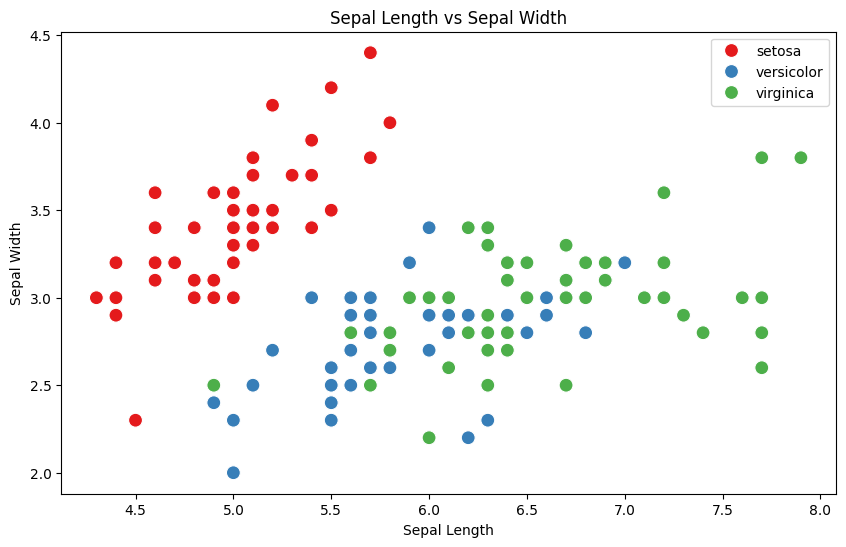

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Loading the iris dataset
iris = load_iris()
iris_df = sns.load_dataset("iris")

# Creating a scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=iris_df, palette="Set1", s=100)
plt.title("Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(loc="upper right")
plt.show()

### **Differences in Bokeh, Matplotlib, Seaborn**

| Feature                | Bokeh                                    | Matplotlib                              | Seaborn                                  |
|------------------------|------------------------------------------|-----------------------------------------|-----------------------------------------|
| **Interactivity**      | High interactivity; supports dynamic plots, interactive widgets, and real-time updates. | Limited interactivity; mainly suitable for static plots. | Limited interactivity; designed for statistical data visualization with basic interactivity. |
| **Web-Based Usage**    | Specifically designed for web-based visualizations. Easy integration with web applications. | Primarily for static visualizations; not specifically designed for web-based deployment. | Focused on static statistical plots; limited web-based features. |
| **Ease of Use**        | Requires a learning curve due to its focus on interactivity and web-based features. | Relatively straightforward; widely used, extensive documentation. | User-friendly, built on top of Matplotlib; good for quick statistical visualizations. |
| **Customization**      | Extensive customization options; provides a wide range of tools for styling and theming. | Highly customizable with a wide range of options; provides fine-grained control over plot appearance. | Simplifies customization compared to Matplotlib; includes default themes for aesthetic plots. |
| **Plot Types**         | Supports a variety of plots, suitable for complex and interactive visualizations. | Comprehensive library with support for various plot types, from basic to advanced. | Focuses on statistical plots; limited compared to Matplotlib and Bokeh in terms of plot variety. |
| **Community Support**  | Active community; good documentation; growing ecosystem of extensions and plugins. | Established and large community; extensive documentation and tutorials available. | Active community; leverages Matplotlib, benefiting from its extensive community support. |
| **Integration**        | Seamless integration with Jupyter Notebooks; supports HTML export for web applications. | Commonly used in Jupyter Notebooks; can be embedded in web applications but with less interactivity. | Easy integration with Matplotlib; uses Matplotlib as a backend; limited web-based integration. |


#### **References**
- https://bokeh.org/
- https://stackshare.io/stackups/bokeh-vs-matplotlib#:~:text=Bokeh%20provides%20a%20higher%20level,PNG%2C%20PDF%2C%20and%20SVG.